- **Author**: Nazmus Sakib
- **ID**: 1905061

In [53]:
! pip install ucimlrepo

# Necessary imports

**Basic Libraries**

In [54]:
import pandas as pd
import numpy as np

**Plotting Libraries**

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

**ML Libraries**

In [56]:

from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix


## Preprocess Telco Dataset

In [57]:
def process_telco_dataset():
    telco_df = pd.read_csv("data/telco_data/WA_Fn-UseC_-Telco-Customer-Churn.csv")

    # Some totalcharges have space ans we will ocnvert it to numeric
    telco_df['TotalCharges'] = telco_df['TotalCharges'].replace(' ', np.nan)
    telco_df['TotalCharges'] = pd.to_numeric(telco_df['TotalCharges'], errors='coerce')

    print("********************************************Summary********************************************")
    print(telco_df.describe())
    print("***********************************************************************************************")
    
    print("********************************************Total Missing**************************************")
    print(telco_df.isnull().sum().sum())
    print("***********************************************************************************************")

    print("********************************************Total Duplication**********************************")
    print(telco_df.duplicated().sum())
    print("***********************************************************************************************")

    #"******************************Drop Rows with target Column is missing********************************
    telco_df.dropna(subset='Churn',inplace=True)
    #"******************************************************************************************************

    #***********************************Drop Duplicates*****************************************************
    telco_df.drop_duplicates(inplace=True) 
    #*******************************************************************************************************

    #***********Dropping "CustomerID" column since it's not useful for prediction*****************************
    telco_df = telco_df.drop(columns=['customerID'])

    #***************Filling the missing values for numeric columns to mean of the column*********************
    telco_df.fillna(telco_df.select_dtypes(include='number').mean(),inplace=True)

    #***************Filling the missing values for categorical columns to mean of the column*****************
    telco_df.fillna(telco_df.select_dtypes(exclude='number').mode().iloc[0],inplace=True)



    # Get all numeric columns
    numeric_columns = telco_df.select_dtypes(include=['float64', 'int64']).columns
    #Get all binary columns
    binary_columns = [col for col in telco_df.columns if telco_df[col].nunique() <= 2]
    print(binary_columns)

    # Label encode binary columns
    label_encoder = LabelEncoder()
    for col in binary_columns:
        telco_df[col] = label_encoder.fit_transform(telco_df[col])
    columns_to_scale = [col for col in numeric_columns if col not in binary_columns]
    scaler = StandardScaler()
    print("Columns to scale:", columns_to_scale)
    telco_df[columns_to_scale] = scaler.fit_transform(telco_df[columns_to_scale])

    # Get all nominal columns
    nominal_columns = [col for col in telco_df.columns if telco_df[col].dtype == 'object' and col not in binary_columns]
    print("Nominal Columns: ", nominal_columns)   

    # One-hot encode nominal columns
    telco_df = pd.get_dummies(telco_df, columns=nominal_columns)

    

    # Convert boolean column to int
    telco_df = telco_df.astype({col: 'int' for col in telco_df.select_dtypes(include=['bool']).columns})
    # telco_df.drop_duplicates(inplace=True) 


    print("********************************************After Processing********************************************")
    print(telco_df.shape)
    print(telco_df.dtypes)
    print(telco_df.isnull().sum().sum())
    print(telco_df.duplicated().sum())
    print("*******************************************************************************************************")
    

    features = telco_df.drop(columns='Churn')
    target = telco_df['Churn']

    # First, split the dataset into training (80%) and testing (20%) sets
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

    print("test set size", len(y_test))
    
    # Then, split the training set further into training (80%) and validation (20%) sets
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
    print("train set size", len(y_train))
    print("validation set size", len(y_val))
    
    return X_train, X_val, X_test, y_train, y_val, y_test

X_train, X_val, X_test, y_train, y_val, y_test = process_telco_dataset()



********************************************Summary********************************************
       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7032.000000
mean        0.162147    32.371149       64.761692   2283.300441
std         0.368612    24.559481       30.090047   2266.771362
min         0.000000     0.000000       18.250000     18.800000
25%         0.000000     9.000000       35.500000    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.850000   3794.737500
max         1.000000    72.000000      118.750000   8684.800000
***********************************************************************************************
********************************************Total Missing**************************************
11
***********************************************************************************************
*************************************

## Preprocess Credit Dataset

In [58]:
def process_credit_dataset():
    credit_df = pd.read_csv("data/credit_data/creditcard.csv")
    print("********************************************Summary********************************************")
    print(credit_df.describe())
    print("***********************************************************************************************")
    
    print("********************************************Total Missing**************************************")
    print(credit_df.isnull().sum().sum())
    print("***********************************************************************************************")

    print("********************************************Total Duplication**********************************")
    print(credit_df.duplicated().sum())
    print("***********************************************************************************************")


    #"******************************Drop Rows with target Column is missing********************************
    target_column = 'Class'
    credit_df.dropna(subset=[target_column], inplace=True)

    #***********************************Drop Duplicates*****************************************************
    credit_df.drop_duplicates(inplace=True)

    #***************Filling the missing values for numeric columns to mean of the column*********************
    credit_df.fillna(credit_df.select_dtypes(include='number').mean(),inplace=True)

    #***************Filling the missing values for categorical columns to mean of the column*****************
    #***************Filling the missing values for categorical columns to mode of the column*****************
    non_numeric_columns = credit_df.select_dtypes(exclude='number').columns

    if not non_numeric_columns.empty:
        credit_df.fillna(credit_df[non_numeric_columns].mode().iloc[0], inplace=True)

    # Separate the positive and negative samples
    negative_samples = credit_df[credit_df['Class'] == 0].sample(n=20000, random_state=42)
    positive_samples = credit_df[credit_df['Class'] == 1]
    

    # Concatenate the positive and negative samples to form the subset
    df_subset = pd.concat([positive_samples, negative_samples])

    #Get all binary columns
    binary_columns = [col for col in df_subset.columns if df_subset[col].nunique() <= 2]
    print(binary_columns)

    # Label encode binary columns
    label_encoder = LabelEncoder()
    for col in binary_columns:
        df_subset[col] = label_encoder.fit_transform(df_subset[col])


    # Get all numeric columns
    numeric_columns = df_subset.select_dtypes(include=['float64', 'int64']).columns
    columns_to_scale = [col for col in numeric_columns if col not in binary_columns]
    scaler = StandardScaler()
    print("Columns to scale:", columns_to_scale)
    df_subset[columns_to_scale] = scaler.fit_transform(df_subset[columns_to_scale])

    # Get all nominal columns
    nominal_columns = [col for col in df_subset.columns if df_subset[col].dtype == 'object' and col not in binary_columns]
    print("Nominal Columns: ", nominal_columns)   

    # One-hot encode nominal columns
    df_subset = pd.get_dummies(df_subset, columns=nominal_columns)


    # Convert boolean column to int
    df_subset = df_subset.astype({col: 'int' for col in df_subset.select_dtypes(include=['bool']).columns})

    print("********************************************After Processing********************************************")
    print(df_subset.shape)
    print(df_subset.dtypes)
    print(df_subset.isnull().sum().sum())
    print(df_subset.duplicated().sum())
    print("*******************************************************************************************************")

    features = df_subset.drop(columns='Class')
    target = df_subset['Class']

    # First, split the dataset into training (80%) and testing (20%) sets
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
    print("test set size", len(y_test))

    # Then, split the training set further into training (80%) and validation (20%) sets
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
    print("train set size", len(y_train))
    print("validation set size", len(y_val))

    return X_train, X_val, X_test, y_train, y_val, y_test

X_train, X_val, X_test, y_train, y_val, y_test = process_credit_dataset()    

    

********************************************Summary********************************************
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.48

## Preprocess Adult Dataset

In [59]:
def process_adult_dataset():
    print("")
    column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 
                    'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 
                    'hours-per-week', 'native-country', 'income']

    print(column_names)
    adult_df = pd.read_csv('data/adult_data/adult.data', header=None, sep=',\s', na_values=["?"], engine='python', names=column_names)
    print("********************************************Summary********************************************")
    print(adult_df.describe())
    print("***********************************************************************************************")
    
    print("********************************************Total Missing**************************************")
    print(adult_df.isnull().sum().sum())
    print("***********************************************************************************************")

    print("********************************************Total Duplication**********************************")
    print(adult_df.duplicated().sum())
    print("***********************************************************************************************")

    #"******************************Drop Rows with target Column is missing********************************
    target_column = 'income'
    adult_df.dropna(subset=[target_column], inplace=True)

    #***********************************Drop Duplicates*****************************************************
    adult_df.drop_duplicates(inplace=True)

    #***********************************Convert Target column to numeric*************************************
    adult_df['income'] = adult_df['income'].str.strip()
    adult_df['income'] = adult_df['income'].replace(['<=50K', '>50K'], [0, 1]).astype(int)

    #***************Filling the missing values for numeric columns to mean of the column*********************
    adult_df.fillna(adult_df.select_dtypes(include='number').mean(),inplace=True)

    #***************Filling the missing values for categorical columns to mean of the column*****************
    adult_df.fillna(adult_df.select_dtypes(exclude='number').mode().iloc[0],inplace=True)

    #Get all binary columns
    binary_columns = [col for col in adult_df.columns if adult_df[col].nunique() <= 2]
    print(binary_columns)

    # Label encode binary columns
    label_encoder = LabelEncoder()
    for col in binary_columns:
        adult_df[col] = label_encoder.fit_transform(adult_df[col])


    # Get all numeric columns
    numeric_columns = adult_df.select_dtypes(include=['float64', 'int64']).columns
    columns_to_scale = [col for col in numeric_columns if col not in binary_columns]
    scaler = StandardScaler()
    print("Columns to scale:", columns_to_scale)
    adult_df[columns_to_scale] = scaler.fit_transform(adult_df[columns_to_scale])

    # Get all nominal columns
    nominal_columns = [col for col in adult_df.columns if adult_df[col].dtype == 'object' and col not in binary_columns]
    print("Nominal Columns: ", nominal_columns)   

    # One-hot encode nominal columns
    adult_df = pd.get_dummies(adult_df, columns=nominal_columns)


    # Convert boolean column to int
    adult_df = adult_df.astype({col: 'int' for col in adult_df.select_dtypes(include=['bool']).columns})

    print("********************************************After Processing********************************************")
    print(adult_df.shape)
    print(adult_df.dtypes)
    print(adult_df.isnull().sum().sum())
    print(adult_df.duplicated().sum())
    print("*******************************************************************************************************")

    features = adult_df.drop(columns='income')
    target = adult_df['income']

    # First, split the dataset into training (80%) and testing (20%) sets
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
    print("test set size", len(y_test))

    # Then, split the training set further into training (80%) and validation (20%) sets
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
    print("train set size", len(y_train))
    print("validation set size", len(y_val))

    return X_train, X_val, X_test, y_train, y_val, y_test

X_train, X_val, X_test, y_train, y_val, y_test = process_adult_dataset()
 



['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']


<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_498516/937677080.py:8: SyntaxWarning: invalid escape sequence '\s'
  adult_df = pd.read_csv('data/adult_data/adult.data', header=None, sep=',\s', na_values=["?"], engine='python', names=column_names)


********************************************Summary********************************************
                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.

/tmp/ipykernel_498516/937677080.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  adult_df['income'] = adult_df['income'].replace(['<=50K', '>50K'], [0, 1]).astype(int)


********************************************After Processing********************************************
(32537, 105)
age                               float64
fnlwgt                            float64
education-num                     float64
sex                                 int64
capital-gain                      float64
                                   ...   
native-country_Thailand             int64
native-country_Trinadad&Tobago      int64
native-country_United-States        int64
native-country_Vietnam              int64
native-country_Yugoslavia           int64
Length: 105, dtype: object
0
0
*******************************************************************************************************
test set size 6508
train set size 20823
validation set size 5206


# prepare Online data

In [60]:
def process_online_dataset():
    online_df = pd.read_csv("data/online/B1.csv")
    print("********************************************Summary********************************************")
    print(online_df.describe())
    print("***********************************************************************************************")
    
    print("********************************************Total Missing**************************************")
    print(online_df.isnull().sum().sum())
    print("***********************************************************************************************")

    print("********************************************Total Duplication**********************************")
    print(online_df.duplicated().sum())
    print("***********************************************************************************************")

    #"******************************Drop Rows with target Column is missing********************************
    target_column = 'y'
    online_df.dropna(subset=[target_column], inplace=True)

    #***********************************Drop Duplicates*****************************************************
    online_df.drop_duplicates(inplace=True)

    #***********************************Convert Target column to numeric*************************************
    # online_df['income'] = adult_df['income'].str.strip()
    # online_df['income'] = adult_df['income'].replace(['<=50K', '>50K'], [0, 1]).astype(int)

    #***************Filling the missing values for numeric columns to mean of the column*********************
    # online_df.fillna(online_df.select_dtypes(include='number').mean(),inplace=True)

    #***************Filling the missing values for categorical columns to mean of the column*****************
    # online_df.fillna(online_df.select_dtypes(exclude='number').mode().iloc[0],inplace=True)

    #Get all binary columns
    binary_columns = [col for col in online_df.columns if online_df[col].nunique() <= 2]
    print(binary_columns)

    # Label encode binary columns
    label_encoder = LabelEncoder()
    for col in binary_columns:
        online_df[col] = label_encoder.fit_transform(online_df[col])


    # Get all numeric columns
    numeric_columns = online_df.select_dtypes(include=['float64', 'int64']).columns
    columns_to_scale = [col for col in numeric_columns if col not in binary_columns]
    scaler = StandardScaler()
    print("Columns to scale:", columns_to_scale)
    online_df[columns_to_scale] = scaler.fit_transform(online_df[columns_to_scale])

    # Get all nominal columns
    nominal_columns = [col for col in online_df.columns if online_df[col].dtype == 'object' and col not in binary_columns]
    print("Nominal Columns: ", nominal_columns)   

    # One-hot encode nominal columns
    online_df = pd.get_dummies(online_df, columns=nominal_columns)


    # Convert boolean column to int
    online_df = online_df.astype({col: 'int' for col in online_df.select_dtypes(include=['bool']).columns})

    print("********************************************After Processing********************************************")
    print(online_df.shape)
    print(online_df.dtypes)
    print(online_df.isnull().sum().sum())
    print(online_df.duplicated().sum())
    print("*******************************************************************************************************")

    features = online_df.drop(columns='y')
    target = online_df['y']

    # First, split the dataset into training (80%) and testing (20%) sets
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
    print("test set size", len(y_test))

    # Then, split the training set further into training (80%) and validation (20%) sets
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
    print("train set size", len(y_train))
    print("validation set size", len(y_val))

    return X_train, X_val, X_test, y_train, y_val, y_test

X_train, X_val, X_test, y_train, y_val, y_test = process_adult_dataset()
 



['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
********************************************Summary********************************************
                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.00000

/tmp/ipykernel_498516/937677080.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  adult_df['income'] = adult_df['income'].replace(['<=50K', '>50K'], [0, 1]).astype(int)


********************************************After Processing********************************************
(32537, 105)
age                               float64
fnlwgt                            float64
education-num                     float64
sex                                 int64
capital-gain                      float64
                                   ...   
native-country_Thailand             int64
native-country_Trinadad&Tobago      int64
native-country_United-States        int64
native-country_Vietnam              int64
native-country_Yugoslavia           int64
Length: 105, dtype: object
0
0
*******************************************************************************************************
test set size 6508
train set size 20823
validation set size 5206


# Implementation of Logistic regression

In [61]:
import numpy as np

class LogisticRegressionCustom:
    def __init__(self, learning_rate=0.01, num_iterations=1000, tolerance=1e-7, lambda_param=0.1):
        """
        We are here initializing the Logistic Regression model.
        
        Parameters:
        learning_rate (float): Step size for gradient descent.
        num_iterations (int): Maximum number of iterations for gradient descent.
        tolerance (float): Stopping criterion for convergence based on cost change.
        lambda_param (float): Regularization strength (L2 regularization).
        track_cost (bool): Whether to track and store the cost history during training.
        """
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.tolerance = tolerance
        self.lambda_param = lambda_param
        self.theta = None
        self.cost_history = []
    
    
    def compute_cost(self, X, y):
        prediction = self.sigmoid(np.dot(X, self.theta))
        

        epsilon = 1e-5  
        m = len(y)
        cost = np.sum(y * np.log(prediction + epsilon) + (1 - y) * np.log(1 - prediction + epsilon))
        cost *= (-1 / m)
        # Exclude bias term

        temp_var = np.sum(self.theta[1:]**2) 
        regularization = (self.lambda_param / (2 * m)) *  temp_var
        result = cost + regularization
        return result
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    
    
    def gradient_descent(self, X, y):
        m, n = X.shape
        self.theta = np.zeros(n)
        
        for i in range(self.num_iterations):
            h = self.sigmoid(np.dot(X, self.theta))
            gradient =(1/m) 
            gradient *=  np.dot(X.T, (h - y))

            
            # Add regularization to gradient (exclude bias term)
            temp_thetas = self.theta[1:]
            gradient[1:] += (self.lambda_param / m) * temp_thetas
            
            self.theta -= self.learning_rate * gradient
            
            cost = self.compute_cost(X, y)
            self.cost_history.append(cost)
            
            if i > 0 and abs(self.cost_history[-1] - self.cost_history[-2]) < self.tolerance:
                break

    def predict_proba(self, X):
        X = np.insert(X, 0, 1, axis=1) 
        return self.sigmoid(np.dot(X, self.theta))
    
    def fit(self, X, y):
        X = np.insert(X, 0, 1, axis=1)  
        self.gradient_descent(X, y)

    
    def predict(self, X, threshold=0.5):
        probabilities = self.predict_proba(X)
        return (probabilities >= threshold).astype(int)
    
     
    
    
    

In [62]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score

**Helper Function for Specificity Calculation**

In [63]:
def compute_specificity(y_true, y_pred):
    """
    Calculate specificity (True Negative Rate) from true and predicted labels.
    """
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fp)

**Helper Function for Model Evaluation**

In [64]:


def evaluate_performance(y_true, y_pred, y_prob):
    """
    Evaluate model performance using various metrics: accuracy, precision, recall, specificity, F1, AUROC, AUPR.
    """
    acc = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred) 
    specificity = compute_specificity(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_prob)
    aupr = average_precision_score(y_true, y_prob)

    return acc, precision, recall, specificity, f1, auc, aupr


**Averaging Probabilities**

In [65]:
def average_probabilities(models, X_test):
    """
    Average the predicted probabilities from all bagged models.
    """
    X_test_np = X_test.values if isinstance(X_test, pd.DataFrame) else X_test

    # Get predicted probabilities from each model
    model_probs = [model.predict_proba(X_test_np) for model in models]
    
    # Average the probabilities
    avg_probs = np.mean(model_probs, axis=0)
    
    return avg_probs

**Majority vote Prediction**

In [66]:
def majority_vote_predictions(models, X_test):
    """
    Perform majority voting on predictions from an ensemble of models.
    """
    X_test_np = X_test.values if isinstance(X_test, pd.DataFrame) else X_test


    model_predictions = [model.predict(X_test_np) for model in models]

    final_predictions = np.round(np.mean(model_predictions, axis=0))
    
    return final_predictions

**Extract base model Prediction**

In [67]:
def extract_base_model_probabilities(models, X):
    """
    Extract the predicted probabilities from base models for stacking.
    """
    X_np = X.values if isinstance(X, pd.DataFrame) else X
    return np.column_stack([model.predict_proba(X_np) for model in models])

**Bagging Implementation for Custom Logistic Regression**

In [68]:
import numpy as np
import pandas as pd

def convert_to_numpy(X, y):
    """
    Convert pandas DataFrame and Series to NumPy arrays if necessary.
    """
    X_np = X.values if isinstance(X, pd.DataFrame) else X
    y_np = y.values if isinstance(y, pd.Series) else y
    return X_np, y_np

def bootstrap_sample(X, y):
    """
    Create a bootstrap sample from the training data.
    """
    indices = np.random.choice(X.shape[0], X.shape[0], replace=True)
    X_sample = X[indices]
    y_sample = y[indices]
    return X_sample, y_sample

def train_logistic_model(X_sample, y_sample):
    """
    Train a custom logistic regression model on the sampled data.
    """
    model = LogisticRegressionCustom(learning_rate=0.01, num_iterations=1000)
    model.fit(X_sample, y_sample)
    return model

def fit_bagged_logistic_regression(X_train, y_train, n_estimators=9):
    """
    Fit an ensemble of logistic regression models using bagging technique.
    """
    bagged_models = []
    
    X_train_np, y_train_np = convert_to_numpy(X_train, y_train)

    for _ in range(n_estimators):
        X_sample, y_sample = bootstrap_sample(X_train_np, y_train_np)

        # Train a logistic regression model
        model = train_logistic_model(X_sample, y_sample)

        # Store the trained model
        bagged_models.append(model)
    
    return bagged_models


**Evaluating majority voting for bagged model**

In [69]:
def evaluate_majority_voting(models, X_test, y_test):
    """
    Evaluate majority voting performance of bagged models on test data.
    """
    y_test_np = y_test.values if isinstance(y_test, pd.Series) else y_test

    
    y_pred_majority = majority_vote_predictions(models, X_test)
    y_prob_majority = average_probabilities(models, X_test)

    
    return evaluate_performance(y_test_np, y_pred_majority, y_prob_majority)

**Stacking with Custom Logistic Regression as Meta-Learner**

**Train meta learner**

In [70]:
def train_meta_learner(X_val, base_val_probs, y_val):
    """
    Train the meta-learner (Custom Logistic Regression) for stacking.
    """
   
    X_extended = np.hstack((X_val, base_val_probs))

    
    meta_model = LogisticRegressionCustom(learning_rate=0.01, num_iterations=1000)
    meta_model.fit(X_extended, y_val)
    
    return meta_model

**Evaluate performance**

In [71]:
def stacking_evaluation(bagged_models, X_val, y_val, X_test, y_test):
    """
    Train and evaluate stacking with logistic regression as meta-learner.
    """
    y_val_np = y_val.values if isinstance(y_val, pd.Series) else y_val
    y_test_np = y_test.values if isinstance(y_test, pd.Series) else y_test

    
    val_probs = extract_base_model_probabilities(bagged_models, X_val)
    test_probs = extract_base_model_probabilities(bagged_models, X_test)

    
    meta_model = train_meta_learner(X_val, val_probs, y_val_np)

    
    X_test_extended = np.hstack((X_test, test_probs))
    y_pred = meta_model.predict(X_test_extended)
    y_prob = meta_model.predict_proba(X_test_extended)

    return evaluate_performance(y_test_np, y_pred, y_prob)

**Calculating Average and Standard Deviation for Bagged Models**

In [72]:
def compute_avg_std(metrics_list):
    """
    Compute the average and standard deviation of the performance metrics.
    """
    avg = np.mean(metrics_list, axis=0)
    stddev = np.std(metrics_list, axis=0)
    return avg, stddev


**Running the Full Experiment**

In [73]:
def run_model_experiments(X_train, y_train, X_val, y_val, X_test, y_test):
    """
    Run experiments with bagging, majority voting, and stacking, and evaluate their performances.
    """
    base_model = LogisticRegressionCustom(learning_rate=0.01, num_iterations=1000)
    base_model.fit(X_train, y_train)
    base_model_metrics = evaluate_performance(y_test, base_model.predict(X_test), base_model.predict_proba(X_test))

    bagged_models = fit_bagged_logistic_regression(X_train, y_train)
    voting_results = evaluate_majority_voting(bagged_models, X_test, y_test)
    stacking_results = stacking_evaluation(bagged_models, X_val, y_val, X_test, y_test)
    bagged_metrics = [evaluate_performance(y_test, model.predict(X_test), model.predict_proba(X_test)) for model in bagged_models]

    return base_model_metrics, bagged_models, stacking_results, voting_results, bagged_metrics


**Analysis Table Generator**

In [74]:

def format_metric_with_stddev(avg, stddev):
    """
    Format the metric with its standard deviation as 'avg ± stddev'.
    """
    return f"{avg:.4f} ± {stddev:.4f}"

# def create_analysis_table(lr_avg, lr_stddev, stacking_results, voting_results):
#     """
#     Create a summary table comparing Logistic Regression, Voting, and Stacking performances.
#     """
#     accuracy = [
#         format_metric_with_stddev(lr_avg[0], lr_stddev[0]), 
#         voting_results[0], 
#         stacking_results[0]
#     ]
#     sensitivity = [
#         format_metric_with_stddev(lr_avg[2], lr_stddev[2]), 
#         voting_results[2], 
#         stacking_results[2]
#     ]
#     specificity = [
#         format_metric_with_stddev(lr_avg[3], lr_stddev[3]), 
#         voting_results[3], 
#         stacking_results[3]
#     ]
#     precision = [
#         format_metric_with_stddev(lr_avg[1], lr_stddev[1]), 
#         voting_results[1], 
#         stacking_results[1]
#     ]
#     f1_score = [
#         format_metric_with_stddev(lr_avg[4], lr_stddev[4]), 
#         voting_results[4], 
#         stacking_results[4]
#     ]
#     auroc = [
#         format_metric_with_stddev(lr_avg[5], lr_stddev[5]), 
#         voting_results[5], 
#         stacking_results[5]
#     ]
#     aupr = [
#         format_metric_with_stddev(lr_avg[6], lr_stddev[6]), 
#         voting_results[6], 
#         stacking_results[6]
#     ]

#     table_data = {
#         'Model': ['Bagged LR (avg)', 'Voting Ensemble', 'Stacking Ensemble'],
#         'Accuracy': accuracy,
#         'Sensitivity': sensitivity,
#         'Specificity': specificity,
#         'Precision': precision,
#         'F1-score': f1_score,
#         'AUROC': auroc,
#         'AUPR': aupr
#     }

#     return pd.DataFrame(table_data)
def create_analysis_table(lr_avg, lr_stddev, base_results, stacking_results, voting_results):
    """
    Create a summary table comparing Base Logistic Regression, Bagged LR, Voting, and Stacking performances.
    """
    accuracy = [
        format_metric_with_stddev(lr_avg[0], lr_stddev[0]), 
        base_results[0], 
        voting_results[0], 
        stacking_results[0]
    ]
    sensitivity = [
        format_metric_with_stddev(lr_avg[2], lr_stddev[2]), 
        base_results[2], 
        voting_results[2], 
        stacking_results[2]
    ]
    specificity = [
        format_metric_with_stddev(lr_avg[3], lr_stddev[3]), 
        base_results[3], 
        voting_results[3], 
        stacking_results[3]
    ]
    precision = [
        format_metric_with_stddev(lr_avg[1], lr_stddev[1]), 
        base_results[1], 
        voting_results[1], 
        stacking_results[1]
    ]
    f1_score = [
        format_metric_with_stddev(lr_avg[4], lr_stddev[4]), 
        base_results[4], 
        voting_results[4], 
        stacking_results[4]
    ]
    auroc = [
        format_metric_with_stddev(lr_avg[5], lr_stddev[5]), 
        base_results[5], 
        voting_results[5], 
        stacking_results[5]
    ]
    aupr = [
        format_metric_with_stddev(lr_avg[6], lr_stddev[6]), 
        base_results[6], 
        voting_results[6], 
        stacking_results[6]
    ]

    table_data = {
        'Model': ['Bagged LR (avg)', 'Base LR', 'Voting Ensemble', 'Stacking Ensemble'],
        'Accuracy': accuracy,
        'Sensitivity': sensitivity,
        'Specificity': specificity,
        'Precision': precision,
        'F1-score': f1_score,
        'AUROC': auroc,
        'AUPR': aupr
    }

    return pd.DataFrame(table_data)



**Violin Plot for Model Performances**

In [75]:
def calculate_performance_metrics(model, X_test, y_test):
    """
    Helper function to calculate performance metrics for a given model.
    """
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)

    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'F1': f1_score(y_test, y_pred),
        'Sensitivity': recall_score(y_test, y_pred),  
        'Precision': precision_score(y_test, y_pred),
        'Specificity': compute_specificity(y_test, y_pred),
        'AUROC': roc_auc_score(y_test, y_prob),
        'AUPR': average_precision_score(y_test, y_prob)
    }

    return metrics

def aggregate_performance_metrics(bagged_models, X_test, y_test):
    """
    Aggregate performance metrics for all bagged models.
    """
    # Convert pandas DataFrames to NumPy arrays if needed
    X_test_np = X_test.values if isinstance(X_test, pd.DataFrame) else X_test
    y_test_np = y_test.values if isinstance(y_test, pd.Series) else y_test

    performances = []
    
    for model in bagged_models:
        metrics = calculate_performance_metrics(model, X_test_np, y_test_np)
        performances.append(metrics)


    performance_df = pd.DataFrame(performances)
    return performance_df

def plot_violin_graph(performance_df):
    """
    Enhanced violin plot for performance metrics.
    """
    plt.figure(figsize=(12, 8))

    sns.violinplot(data=performance_df, inner="point", palette="Set3")

    plt.title('Distribution of Performance Metrics for Bagged Logistic Regression Models', fontsize=16)
    plt.ylabel('Metric Score', fontsize=12)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)


    plt.grid(True, linestyle='--', alpha=0.6)

    plt.show()

def plot_performance_violin(bagged_models, X_test, y_test):
    """
    Main function to calculate and plot performance metrics of bagged models.
    """

    performance_df = aggregate_performance_metrics(bagged_models, X_test, y_test)

    plot_violin_graph(performance_df)


**Final processing for all models**

In [76]:
def process_all_models(X_train, X_val, X_test, y_train, y_val, y_test):
    """
    Main function to run model experiments, generate results, and plot analysis.
    """
    # Run all model experiments
    base_model_metrics, bagged_models, stacking_results, voting_results, bagged_metrics = run_model_experiments(X_train, y_train, X_val, y_val, X_test, y_test)

    # Compute average and standard deviation for bagged models
    lr_avg, lr_stddev = compute_avg_std(bagged_metrics)

    # Generate analysis table
    analysis_table = create_analysis_table(lr_avg, lr_stddev, base_model_metrics, stacking_results, voting_results)

    # Plot violin graph of model performances
    plot_performance_violin(bagged_models, X_test, y_test)

    return analysis_table


# Running for the datasets

********************************************Summary********************************************
                X1           X2            y
count  3000.000000  3000.000000  3000.000000
mean      0.000409     0.002794     0.500000
std       0.567664     0.569958     0.500083
min      -1.250040    -1.252967     0.000000
25%      -0.444872    -0.435276     0.000000
50%      -0.001097    -0.000056     0.500000
75%       0.425278     0.441895     1.000000
max       1.264823     1.289248     1.000000
***********************************************************************************************
********************************************Total Missing**************************************
0
***********************************************************************************************
********************************************Total Duplication**********************************
0
***********************************************************************************************
['y']
Columns t

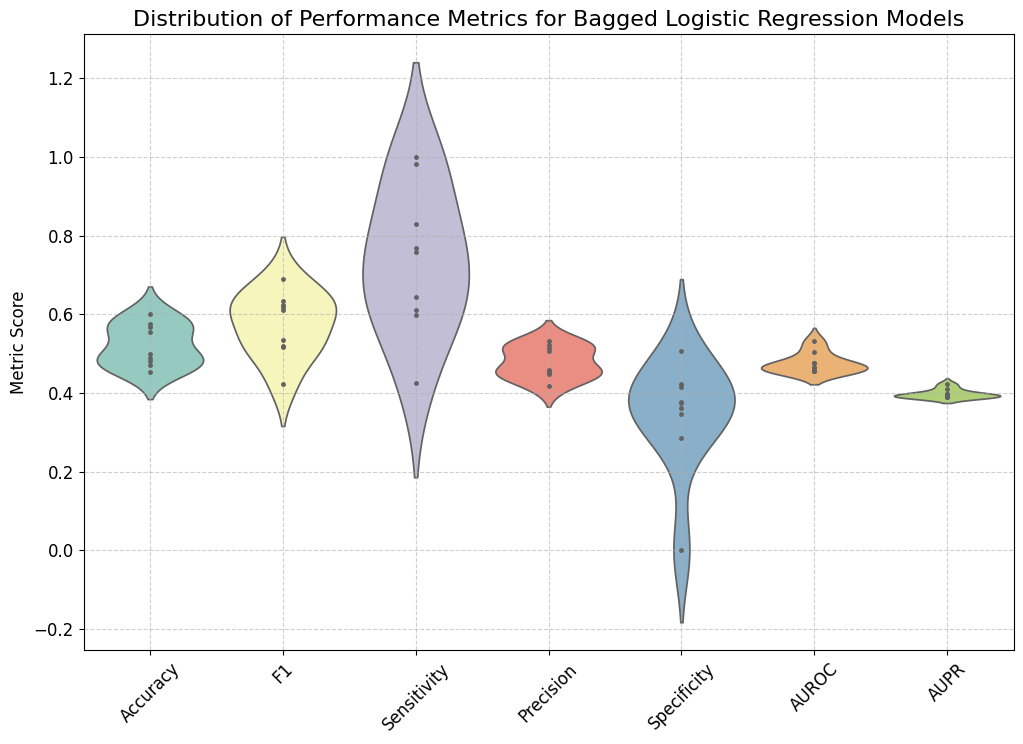

,Model,Accuracy,Sensitivity,Specificity,Precision,F1-score,AUROC,AUPR
0,Bagged LR (avg),0.5213 ± 0.0504,0.7353 ± 0.1762,0.3438 ± 0.1341,0.4786 ± 0.0381,0.5743 ± 0.0775,0.4762 ± 0.0246,0.3979 ± 0.0107
1,Base LR,0.535,0.805147,0.310976,0.492135,0.610879,0.456914,0.389816
2,Voting Ensemble,0.57,0.830882,0.353659,0.515982,0.63662,0.457575,0.390189
3,Stacking Ensemble,0.518333,0.507353,0.527439,0.47099,0.488496,0.531754,0.42391


In [77]:
process_all_models(*process_online_dataset())

********************************************Summary********************************************
       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7032.000000
mean        0.162147    32.371149       64.761692   2283.300441
std         0.368612    24.559481       30.090047   2266.771362
min         0.000000     0.000000       18.250000     18.800000
25%         0.000000     9.000000       35.500000    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.850000   3794.737500
max         1.000000    72.000000      118.750000   8684.800000
***********************************************************************************************
********************************************Total Missing**************************************
11
***********************************************************************************************
*************************************

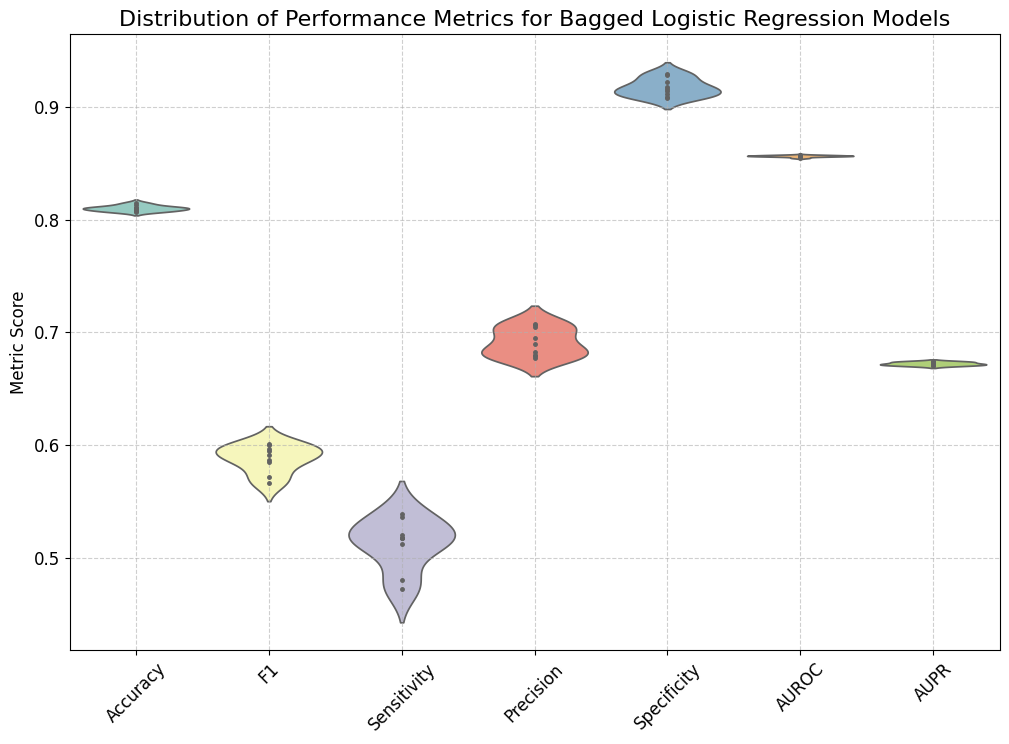

,Model,Accuracy,Sensitivity,Specificity,Precision,F1-score,AUROC,AUPR
0,Bagged LR (avg),0.8102 ± 0.0023,0.5124 ± 0.0214,0.9174 ± 0.0074,0.6913 ± 0.0118,0.5881 ± 0.0115,0.8565 ± 0.0007,0.6722 ± 0.0014
1,Base LR,0.814762,0.533512,0.916023,0.695804,0.603945,0.856909,0.674557
2,Voting Ensemble,0.812633,0.514745,0.919884,0.698182,0.592593,0.856849,0.673508
3,Stacking Ensemble,0.814053,0.560322,0.905405,0.680782,0.614706,0.85716,0.67133


In [78]:
process_all_models(*process_telco_dataset())


['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
********************************************Summary********************************************
                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.00000

/tmp/ipykernel_498516/937677080.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  adult_df['income'] = adult_df['income'].replace(['<=50K', '>50K'], [0, 1]).astype(int)


0
0
*******************************************************************************************************
test set size 6508
train set size 20823
validation set size 5206


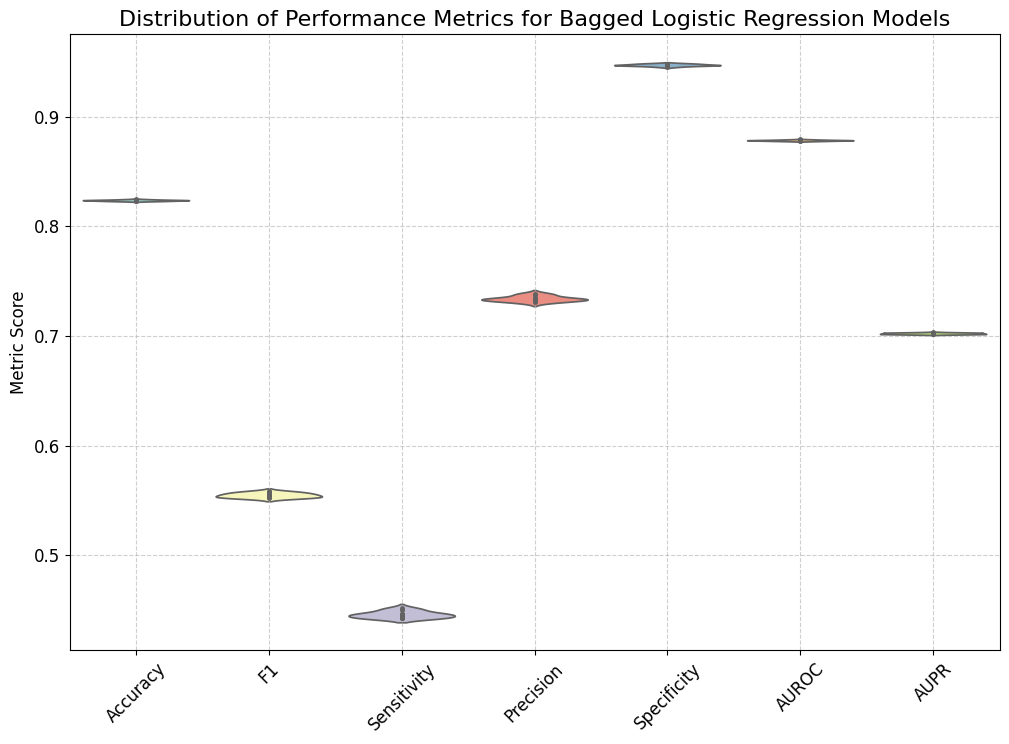

,Model,Accuracy,Sensitivity,Specificity,Precision,F1-score,AUROC,AUPR
0,Bagged LR (avg),0.8238 ± 0.0005,0.4460 ± 0.0029,0.9472 ± 0.0009,0.7341 ± 0.0024,0.5549 ± 0.0020,0.8784 ± 0.0004,0.7024 ± 0.0006
1,Base LR,0.823755,0.446039,0.947197,0.734086,0.554909,0.878621,0.70275
2,Voting Ensemble,0.823755,0.446039,0.947197,0.734086,0.554909,0.878541,0.702535
3,Stacking Ensemble,0.823602,0.451029,0.945362,0.729566,0.55744,0.879377,0.705576


In [79]:
process_all_models(*process_adult_dataset())

********************************************Summary********************************************
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.48

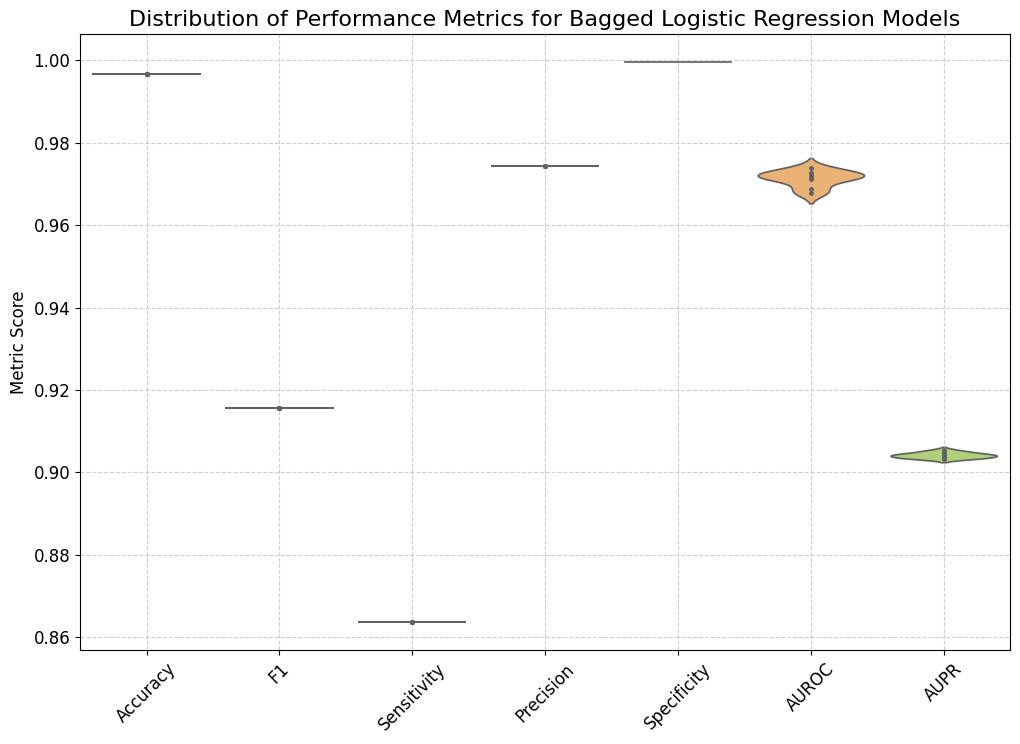

,Model,Accuracy,Sensitivity,Specificity,Precision,F1-score,AUROC,AUPR
0,Bagged LR (avg),0.9966 ± 0.0000,0.8636 ± 0.0000,0.9995 ± 0.0000,0.9744 ± 0.0000,0.9157 ± 0.0000,0.9713 ± 0.0018,0.9042 ± 0.0006
1,Base LR,0.996581,0.863636,0.999501,0.974359,0.915663,0.970761,0.904277
2,Voting Ensemble,0.996581,0.863636,0.999501,0.974359,0.915663,0.971587,0.904557
3,Stacking Ensemble,0.996581,0.863636,0.999501,0.974359,0.915663,0.979437,0.907431


In [80]:
process_all_models(*process_credit_dataset())